In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import torch

In [2]:
import pickle
with open('/Users/cdonnat/Downloads/drug_data.pkl', 'rb') as f:
    dictionary = pickle.load( f)

In [11]:
print(dictionary['DB00001'].keys())
print("The dictionay is of size %d"%(len(dictionary)))

dict_keys(['drugbank_id', 'name', 'description', 'indication', 'pharmacodynamics', 'toxicity', 'metabolism', 'absorption', 'half_life', 'market_start', 'affected_organism', 'market_end', 'mechanism_of_action', 'route_of_elimination', 'volume_of_distribution', 'classification', 'carriers', 'targets', 'transporters', 'enzymes', 'atc_code', 'identifiers', 'categories', 'atc_hierarchy', 'food_interactions', 'ddi', 'smile', 'names', 'pathways'])
The dictionay is of size 14315


In [14]:
##### Evaluate the importance of missing data
def evaluate_available_data_proportion(dictionary):
    no_cat = 0
    no_atc = 0
    no_smile = 0
    no_class = 0
    no_pathway = 0
    no_ddi= 0
    no_transporters = 0
    no_carriers = 0
    no_indication = 0
    no_targets = 0
    nothing = 0
    nothing_list = []
    for drug in dictionary.keys():
        if len(dictionary[drug]['atc_hierarchy']) == 0:
            no_atc += 1
        if len(dictionary[drug]['categories']) == 0:
            no_cat += 1
        if len(dictionary[drug]['smile']) == 0:
            no_smile += 1
        if len(dictionary[drug]['classification'])==0:
            no_class +=1
        if len(dictionary[drug]['pathways'])==0:
            no_pathway +=1
        if len(dictionary[drug]['ddi'])==0:
            no_ddi +=1
        if len(dictionary[drug]['transporters'])==0:
            no_transporters +=1
        if len(dictionary[drug]['carriers'])==0:
            no_carriers +=1
        if len(dictionary[drug]['indication'])==0:
            no_indication +=1
            #print(drug)
        if len(dictionary[drug]['targets'])==0:
            no_targets +=1
            #print(drug) 
        if len(dictionary[drug]['atc_hierarchy']) + len(dictionary[drug]['categories']) + len(dictionary[drug]['smile']) + len(dictionary[drug]['pathways'])  + len(dictionary[drug]['classification']) + len(dictionary[drug]['transporters']) + len(dictionary[drug]['ddi'])==0:
            nothing +=1
            nothing_list += [drug]
    return({'categories': 1.0 - no_cat/len(dictionary), 
          'atc': 1.0 - no_atc/len(dictionary), 
          'smile': 1.0 - no_smile/len(dictionary), 
          'classification': 1.0 - no_class/len(dictionary),
          'pathway': 1.0 - no_pathway/len(dictionary), 
          'ddi': 1.0 - no_ddi/len(dictionary), 
          'carriers': 1.0 - no_carriers/len(dictionary), 
          'transporters': 1.0 - no_transporters/len(dictionary), 
          'indication': 1.0 - no_indication/len(dictionary),
           'target': 1.0 - no_targets/len(dictionary), 
           'nothing at all': nothing/len(dictionary)}, nothing_list)

evaluate_available_data_proportion(dictionary)

({'catgories': 0.5914774711840727,
  'atc': 0.22521830247991614,
  'smile': 0.7801606706252183,
  'classification': 0.7256025148445686,
  'pathway': 0.04505763185469791,
  'ddi': 0.29975550122249384,
  'carriers': 0.04009779951100245,
  'transporters': 0.07076493188962629,
  'indication': 0.28159273489346837,
  'target': 0.26315054139015015,
  'nothing at all': 0.07516590988473629},
 ['DB01341',
  'DB01448',
  'DB03378',
  'DB04848',
  'DB04893',
  'DB04928',
  'DB04929',
  'DB04943',
  'DB04959',
  'DB04963',
  'DB04968',
  'DB04991',
  'DB04995',
  'DB04997',
  'DB04999',
  'DB05001',
  'DB05011',
  'DB05014',
  'DB05017',
  'DB05021',
  'DB05023',
  'DB05024',
  'DB05027',
  'DB05033',
  'DB05036',
  'DB05042',
  'DB05043',
  'DB05044',
  'DB05046',
  'DB05049',
  'DB05052',
  'DB05055',
  'DB05056',
  'DB05059',
  'DB05061',
  'DB05068',
  'DB05069',
  'DB05070',
  'DB05071',
  'DB05072',
  'DB05078',
  'DB05079',
  'DB05080',
  'DB05081',
  'DB05082',
  'DB05085',
  'DB05090',
  '

In [15]:
available_stats, nothing_list = evaluate_available_data_proportion(dictionary)

In [16]:
###### Remove the drugs that are useless
for n in nothing_list:
    dictionary.pop(n)
available_stats, _ = evaluate_available_data_proportion(dictionary)
print(available_stats)

{'catgories': 0.6395498149407055, 'atc': 0.24352292469219727, 'smile': 0.8435682453357505, 'classification': 0.7845758743107485, 'pathway': 0.04871969181962388, 'ddi': 0.3241181358108618, 'carriers': 0.04320568018732529, 'transporters': 0.07651635319888206, 'indication': 0.2827252813656621, 'target': 0.27494523755570666, 'nothing at all': 0.0}


In [17]:
dp = []
king = []
classes =[]
subclasses = []
superclasses =[]

for drug in dictionary.keys():
    if len(dictionary[drug]['classification'])>0:
        dp += [dictionary[drug]['classification']['direct-parent'].lower()]
        king += [dictionary[drug]['classification']['kingdom'].lower()] 
        superclasses += [dictionary[drug]['classification']['superclass'].lower()] 
        classes += [dictionary[drug]['classification']['class'].lower()] 
        subclasses += [dictionary[drug]['classification']['subclass'].lower()] 
    

## I. First Simple Graph


In the first simple graph, drugs are encoded as nodes. The rest of the potential nodes are simply features of the nodes. It is quite a high dimensional graph, but maybe that's fine.



In [18]:
##### Convert things into features

(1279, 2, 25, 304, 511)

In [47]:
category_dict = {}
for drug in dictionary.keys():
    if len(dictionary[drug]['categories'])>0:
        category_dict[drug]= {u[0]: 1 for u in dictionary[drug]['categories'] }
len(np.unique(category))  

4149

In [48]:
cat_mat = pd.DataFrame.from_dict(category_dict, ).T
cat_mat = cat_mat.fillna(0)

In [49]:
cat_mat = cat_mat.iloc[:, np.where(cat_mat.sum()>1)[0]]

In [50]:
cat_mat.shape

(8467, 2876)

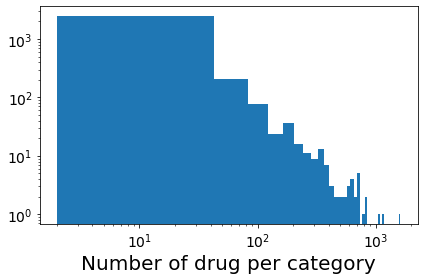

In [230]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(6,4))
counts = cat_mat.sum(0)
#sns.histplot(counts, x='prop')
plt.hist(counts, bins =40 )
ax.tick_params(axis='both', labelsize=14)
ax.set_xlabel('Number of drug per category', fontsize=20)
plt.yscale("log")
plt.xscale("log")
# ax.set_ylabel('Number of drugs \n in each class', fontsize=20)
plt.tight_layout()
plt.savefig("/Users/cdonnat/Downloads/categories_dual.png")

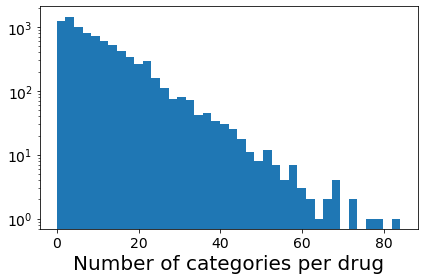

In [222]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
counts = cat_mat.sum(1)
#sns.histplot(counts, x='prop')
plt.hist(counts, bins =40 )
ax.tick_params(axis='both', labelsize=14)
ax.set_xlabel('Number of categories per drug', fontsize=20)
plt.yscale("log")
# ax.set_ylabel('Number of drugs \n in each class', fontsize=20)
plt.tight_layout()
plt.savefig("/Users/cdonnat/Downloads/categories_log.png")

In [211]:
cat_mat = cat_mat.fillna(0)

In [54]:
#### Add the hierarchy
atc_df = {}
for drug in dictionary.keys():
    for u in dictionary[drug]['atc_hierarchy']:
        if u[1] not in atc_df.keys():
            atc_df[u[1]] = [drug]
        else:
            atc_df[u[1]] += [drug]

In [55]:
atc_pd = pd.DataFrame(np.zeros((len(dictionary), len(atc_df))), index=dictionary.keys(), columns=atc_df.keys())

In [57]:
for drug in dictionary.keys():
    for u in dictionary[drug]['atc_hierarchy']:
        atc_pd.loc[drug][u[1]] += 1   

In [139]:
x = cat_mat.merge(atc_pd, left_index=True, right_index=True, how='outer' )

In [92]:
node_classes = []
node_classes_dict = {}
it = 0
for drug in dictionary.keys():
    if len(dictionary[drug]['classification'])>0:
        parent = dictionary[drug]['classification']['direct-parent'].lower()
        kingdom = dictionary[drug]['classification']['kingdom'].lower()
        sup = dictionary[drug]['classification']['superclass'].lower()
        sub = dictionary[drug]['classification']['subclass'].lower()
        cl = dictionary[drug]['classification']['class'].lower()
        if drug not in node_classes_dict.keys():
            node_classes_dict[drug] = {'parent': parent,
                                      'kingdom': kingdom,
                                       'superclass': sup,
                                        'subclass': sub,
                                       'class': cl
                                      }        

In [127]:
classes_data  = pd.get_dummies(pd.DataFrame.from_dict(node_classes_dict).T)

In [131]:
classes_data = classes_data.iloc[:, np.where(classes_data.sum()>1)[0]]

In [140]:
x = x.merge(classes_data, left_index=True, right_index=True, how='outer' )

In [141]:
x.shape

(13239, 5349)

In [142]:
dictionary['DB00001'].keys()

dict_keys(['drugbank_id', 'name', 'description', 'indication', 'pharmacodynamics', 'toxicity', 'metabolism', 'absorption', 'half_life', 'market_start', 'affected_organism', 'market_end', 'mechanism_of_action', 'route_of_elimination', 'volume_of_distribution', 'classification', 'carriers', 'targets', 'transporters', 'enzymes', 'atc_code', 'identifiers', 'categories', 'atc_hierarchy', 'food_interactions', 'ddi', 'smile', 'names', 'pathways'])

In [143]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
mols = []
for drug in dictionary.keys():
    if len(dictionary[drug]['smile'])>0:
        try:
            fp = Chem.RDKFingerprint(Chem.MolFromSmiles(dictionary[drug]['smile'][0]))
            mols += [[drug, dictionary[drug]['smile'][0], fp ]]
        except:
            print(drug)

[16:00:34] Explicit valence for atom # 0 N, 4, is greater than permitted
[16:00:34] Explicit valence for atom # 0 N, 4, is greater than permitted


DB00515
DB00526


[16:00:34] Explicit valence for atom # 0 N, 4, is greater than permitted


DB00958


[16:00:35] Explicit valence for atom # 13 Cl, 5, is greater than permitted
[16:00:35] SMILES Parse Error: syntax error while parsing: OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC=C(C=C1)S(O)(O)O)C1=CC=C(C=C1)S([O-])([O-])[O-])\C1=CC=C(C=C1)S(O)(O)[O-]
[16:00:35] SMILES Parse Error: Failed parsing SMILES 'OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC=C(C=C1)S(O)(O)O)C1=CC=C(C=C1)S([O-])([O-])[O-])\C1=CC=C(C=C1)S(O)(O)[O-]' for input: 'OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC=C(C=C1)S(O)(O)O)C1=CC=C(C=C1)S([O-])([O-])[O-])\C1=CC=C(C=C1)S(O)(O)[O-]'


DB01929
DB01999


[16:00:35] Explicit valence for atom # 14 N, 5, is greater than permitted


DB02188


[16:00:36] Explicit valence for atom # 19 O, 3, is greater than permitted


DB02667


[16:00:37] Explicit valence for atom # 6 N, 4, is greater than permitted


DB03492


[16:00:37] Explicit valence for atom # 0 O, 3, is greater than permitted
[16:00:37] Explicit valence for atom # 3 N, 4, is greater than permitted
[16:00:37] Unusual charge on atom 0 number of radical electrons set to zero


DB04100
DB04231


[16:00:37] Explicit valence for atom # 4 F, 2, is greater than permitted


DB04444


[16:00:41] Explicit valence for atom # 13 Be, 3, is greater than permitted


DB08276


[16:00:42] Explicit valence for atom # 84 N, 4, is greater than permitted


DB09385


[16:00:42] SMILES Parse Error: syntax error while parsing: OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1
[16:00:42] SMILES Parse Error: Failed parsing SMILES 'OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1' for input: 'OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1'


DB11630


[16:00:44] Explicit valence for atom # 1 Cl, 4, is greater than permitted


DB12453


[16:00:44] Explicit valence for atom # 0 N, 4, is greater than permitted


DB13145


[16:00:45] Explicit valence for atom # 5 K, 2, is greater than permitted


DB14497


[16:00:47] WARNING: not removing hydrogen atom without neighbors
[16:00:47] WARNING: not removing hydrogen atom without neighbors
[16:00:47] WARNING: not removing hydrogen atom without neighbors


DB16407


[16:00:47] Explicit valence for atom # 14 N, 4, is greater than permitted


In [145]:
len(mols)

11150

In [146]:
np.zeros((len(mols), len(mols)))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [147]:
#### Compute the similarity between these molecule
from rdkit import DataStructs
similarity_graph = np.zeros((len(mols), len(mols)))
for i, m in enumerate(mols):
    print(i)
    for j, mm in enumerate(mols):
        similarity_graph[i,j] = DataStructs.FingerprintSimilarity(m[2], mm[2])
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066


3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705


5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345


6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984


8431
8432
8433
8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630


10062
10063
10064
10065
10066
10067
10068
10069
10070
10071
10072
10073
10074
10075
10076
10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
10221
10222
10223
10224
10225
10226
10227
1022

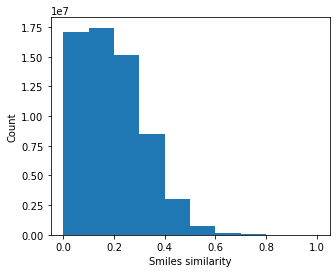

In [150]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.subplots(figsize=(5,4))
plt.hist((similarity_graph)[np.triu_indices(similarity_graph.shape[0], k=1)])
plt.xlabel("Smiles similarity")
plt.ylabel("Count")
plt.savefig("/Users/cdonnat/Downloads/similarities_smiles_data.png")

In [151]:
np.quantile((similarity_graph)[np.triu_indices(similarity_graph.shape[0], k=1)], np.array([0.8, 0.9, 0.95]))

array([0.30078637, 0.36536485, 0.42047532])

In [152]:
names = [m[0] for m in mols]
graph_smiles = pd.DataFrame(similarity_graph,
                            columns=names, index=names
                           )
graph_smiles.to_csv("/Users/cdonnat/Downloads/smiles_graphs_full.csv")


KeyboardInterrupt



In [153]:
threshold = np.quantile((similarity_graph)[np.triu_indices(similarity_graph.shape[0], k=1)], np.array([0.95]))[0]
similarity_graph[np.where(similarity_graph<threshold)] = 0


In [154]:
names = [m[0] for m in mols]
graph_smiles = pd.DataFrame(similarity_graph,
                            columns=names, index=names
                           )
graph_smiles.to_csv("/Users/cdonnat/Downloads/smiles_graphs_thresholded.csv")

KeyboardInterrupt: 

In [221]:
graph_smiles

,DB00006,DB00007,DB00014,DB00027,DB00035,DB00050,DB00067,DB00080,DB00091,DB00093,...,DB16349,DB16351,DB16353,DB16390,DB16397,DB16400,DB16403,DB16404,DB16406,DB16408
DB00006,1.000000,0.637470,0.580456,0.545535,0.748008,0.711069,0.719690,0.574965,0.511494,0.695182,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.421884
DB00007,0.637470,1.000000,0.874204,0.729610,0.604918,0.750432,0.589702,0.648575,0.427083,0.567941,...,0.000000,0.0,0.467516,0.474143,0.0,0.000000,0.426014,0.0,0.459285,0.499734
DB00014,0.580456,0.874204,1.000000,0.654488,0.543575,0.668470,0.558019,0.677800,0.000000,0.521803,...,0.446135,0.0,0.479951,0.515616,0.0,0.433479,0.460336,0.0,0.494587,0.550237
DB00027,0.545535,0.729610,0.654488,1.000000,0.515723,0.635009,0.516904,0.619655,0.000000,0.524862,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
DB00035,0.748008,0.604918,0.543575,0.515723,1.000000,0.675856,0.947668,0.491736,0.425752,0.931475,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DB16400,0.000000,0.000000,0.433479,0.000000,0.000000,0.000000,0.000000,0.434362,0.000000,0.000000,...,0.000000,0.0,0.000000,0.445741,0.0,1.000000,0.435345,0.0,0.458908,0.481720
DB16403,0.000000,0.426014,0.460336,0.000000,0.000000,0.000000,0.000000,0.467797,0.000000,0.000000,...,0.000000,0.0,0.439720,0.501110,0.0,0.435345,1.000000,0.0,0.484645,0.572483
DB16404,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.000000,0.000000
DB16406,0.000000,0.459285,0.494587,0.000000,0.000000,0.000000,0.000000,0.517144,0.000000,0.000000,...,0.491395,0.0,0.485566,0.535011,0.0,0.458908,0.484645,0.0,1.000000,0.606250


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
index = np.random.choice(np.arange(len(mols)), 5000)
plt.figure()
sb.clustermap(graph_smiles.iloc[index, index])
plt.savefig("/Users/cdonnat/Downloads/heatmap_smiles_thresholded.png")

In [124]:
x.to_csv("~/Downloads/features_drugs.csv")

In [170]:
#### Need to add the pathway information in the fdrugs
dictionary['DB00001']['pathways'][u]

{'smpdb_id': 'SMP0000278',
 'name_pathway': 'Lepirudin Action Pathway',
 'category_pathway': 'drug_action',
 'drugs_in_pathway': ['DB00001', 'DB01022', 'DB01373'],
 'enzymes_in_pathway': ['P00734',
  'P00748',
  'P02452',
  'P03952',
  'P03951',
  'P00740',
  'P00451',
  'P12259',
  'P00742',
  'P02671',
  'P02675',
  'P02679',
  'P00488',
  'P05160',
  'P00747',
  'P00750',
  'P08709',
  'P13726',
  'Q9BQB6',
  'P38435']}

In [171]:
dictionary[ 'DB01373']

{'drugbank_id': 'DB01373',
 'name': 'Calcium',
 'description': 'Calcium plays a vital role in the anatomy, physiology and biochemistry of organisms and of the cell, particularly in signal transduction pathways. The skeleton acts as a major mineral storage site for the element and releases Ca2+ ions into the bloodstream under controlled conditions. Circulating calcium is either in the free, ionized form or bound to blood proteins such as serum albumin. Although calcium flow to and from the bone is neutral, about 5 mmol is turned over a day. Bone serves as an important storage point for calcium, as it contains 99% of the total body calcium. Low calcium intake may also be a risk factor in the development of osteoporosis. The best-absorbed form of calcium from a pill is a calcium salt like carbonate or phosphate. Calcium gluconate and calcium lactate are absorbed well by pregnant women. Seniors absorb calcium lactate, gluconate and citrate better unless they take their calcium supplement w

In [174]:
pathway = []
enzymes_drugs = []
it = 0
for drug in dictionary.keys():
    if len(dictionary[drug]['pathways'])>0:
        for u in dictionary[drug]['pathways'].keys():
            pathway += [dictionary[drug]['pathways'][u]['smpdb_id']]
            enzymes_drugs += dictionary[drug]['pathways'][u]['drugs_in_pathway'] + dictionary[drug]['pathways'][u]['enzymes_in_pathway']
        
        

In [177]:
len(np.unique(enzymes_drugs))

1717

In [178]:
pathway_data = pd.DataFrame(np.zeros((len(dictionary), len(np.unique(pathway)))),
                           index=dictionary.keys(), columns = np.unique(pathway))
pathway_similarity = pd.DataFrame(np.zeros((len(dictionary), len(np.unique(enzymes_drugs)))),
                           index=dictionary.keys(), columns = np.unique(enzymes_drugs))

In [179]:
pathway = []
it = 0
for drug in dictionary.keys():
    if len(dictionary[drug]['pathways'])>0:
        for u in dictionary[drug]['pathways'].keys():
            pathway_data.loc[drug][dictionary[drug]['pathways'][u]['smpdb_id']] += 1
            for uu in dictionary[drug]['pathways'][u]['drugs_in_pathway'] + dictionary[drug]['pathways'][u]['enzymes_in_pathway']:
                pathway_similarity.loc[drug][uu] += 1
            

In [185]:
sim_paths = pathway_similarity.dot(pathway_similarity.T)
sim_paths[sim_paths>0]=1

In [186]:
sim_paths

,DB00001,DB00002,DB00003,DB00004,DB00005,DB00006,DB00007,DB00008,DB00009,DB00010,...,DB16414,DB16415,DB16416,DB16417,DB16418,DB16419,DB16420,DB16421,DB16422,DB16423
DB00001,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DB00002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DB00003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DB00004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DB00005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DB16419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DB16420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DB16421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DB16422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [187]:
x = x.merge(pathway_data, left_index=True, right_index=True, how='outer' )

In [188]:
x.shape

(13239, 6226)

In [190]:
### Create Y
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words.add("may")
name_drugs = {k : dictionary[k]['name'].lower() for k in dictionary.keys()}

no_go_words = ["-uracil", " 400", "I-131"]
### Create the labels:
type_interaction = ""
seen_interactions = []
clusters = []
ddi_edges = []
#### Need to create a cluster analysis

new_it = 0
for it, k in enumerate(dictionary.keys()):
    print(k)
    old_int = ""
    if len(dictionary[k]['ddi']) > 0:
        for key2 in dictionary[k]['ddi'].keys():
            new_int = dictionary[k]['ddi'][key2]['description'].replace(dictionary[k]['name'], "drugA")
            new_int = new_int.replace(dictionary[k]['ddi'][key2]['name'], "drugB")
            ddi_edges += [[k, key2]]
            if new_int not in seen_interactions:
                seen_interactions += [new_int]
                clusters += [[it, new_it, ]]
                new_it += 1
                type_interaction += new_int.lower()
            else:
                j = np.where([new_int == s for s in seen_interactions])[0][0]
                clusters += [[it, j]]
                
                
#### Usef            
type_interaction = re.split('\W+', type_interaction.lower())

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cdonnat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


DB00001
DB00002
DB00003
DB00004
DB00005
DB00006
DB00007
DB00008
DB00009
DB00010
DB00011
DB00012
DB00013
DB00014
DB00015
DB00016
DB00017
DB00018
DB00019
DB00020
DB00022
DB00023
DB00024
DB00025
DB00026
DB00027
DB00028
DB00029
DB00030
DB00031
DB00032
DB00033
DB00034
DB00035
DB00036
DB00038
DB00039
DB00040
DB00041
DB00042
DB00043
DB00044
DB00045
DB00046
DB00047
DB00048
DB00049
DB00050
DB00051
DB00052
DB00053
DB00054
DB00055
DB00056
DB00057
DB00058
DB00059
DB00060
DB00061
DB00062
DB00063
DB00065
DB00066
DB00067
DB00068
DB00069
DB00070
DB00071
DB00072
DB00073
DB00074
DB00075
DB00076
DB00078
DB00080
DB00081
DB00082
DB00083
DB00085
DB00086
DB00087
DB00088
DB00089
DB00090
DB00091
DB00092
DB00093
DB00094
DB00095
DB00097
DB00098
DB00099
DB00100
DB00102
DB00103
DB00104
DB00105
DB00106
DB00107
DB00108
DB00109
DB00110
DB00111
DB00112
DB00113
DB00114
DB00115
DB00116
DB00117
DB00118
DB00119
DB00120
DB00121
DB00122
DB00123
DB00125
DB00126
DB00127
DB00128
DB00129
DB00130
DB00131
DB00132
DB00133
DB00134


DB01045
DB01046
DB01047
DB01048
DB01049
DB01050
DB01051
DB01053
DB01054
DB01055
DB01056
DB01057
DB01058
DB01059
DB01060
DB01061
DB01062
DB01063
DB01064
DB01065
DB01066
DB01067
DB01068
DB01069
DB01070
DB01071
DB01072
DB01073
DB01074
DB01075
DB01076
DB01077
DB01078
DB01079
DB01080
DB01081
DB01082
DB01083
DB01084
DB01085
DB01086
DB01087
DB01088
DB01089
DB01090
DB01091
DB01092
DB01093
DB01094
DB01095
DB01096
DB01097
DB01098
DB01099
DB01100
DB01101
DB01102
DB01103
DB01104
DB01105
DB01106
DB01107
DB01108
DB01109
DB01110
DB01111
DB01112
DB01113
DB01114
DB01115
DB01116
DB01117
DB01118
DB01119
DB01120
DB01121
DB01122
DB01123
DB01124
DB01125
DB01126
DB01127
DB01128
DB01129
DB01130
DB01131
DB01132
DB01133
DB01134
DB01135
DB01136
DB01137
DB01138
DB01139
DB01140
DB01141
DB01142
DB01143
DB01144
DB01145
DB01146
DB01147
DB01148
DB01149
DB01150
DB01151
DB01152
DB01153
DB01154
DB01155
DB01156
DB01157
DB01158
DB01159
DB01160
DB01161
DB01162
DB01163
DB01164
DB01165
DB01166
DB01167
DB01168
DB01169
DB01170


DB02209
DB02210
DB02211
DB02213
DB02214
DB02215
DB02216
DB02217
DB02218
DB02219
DB02220
DB02221
DB02222
DB02223
DB02224
DB02225
DB02226
DB02227
DB02228
DB02229
DB02230
DB02232
DB02233
DB02234
DB02235
DB02236
DB02237
DB02238
DB02239
DB02240
DB02241
DB02242
DB02243
DB02245
DB02247
DB02248
DB02249
DB02251
DB02252
DB02253
DB02254
DB02255
DB02256
DB02257
DB02258
DB02259
DB02260
DB02261
DB02262
DB02263
DB02264
DB02265
DB02266
DB02267
DB02268
DB02269
DB02270
DB02271
DB02272
DB02273
DB02274
DB02275
DB02276
DB02277
DB02278
DB02279
DB02280
DB02281
DB02282
DB02283
DB02285
DB02286
DB02287
DB02288
DB02289
DB02290
DB02292
DB02293
DB02294
DB02295
DB02296
DB02297
DB02298
DB02299
DB02300
DB02301
DB02302
DB02303
DB02304
DB02305
DB02306
DB02307
DB02308
DB02309
DB02310
DB02311
DB02312
DB02313
DB02314
DB02315
DB02316
DB02317
DB02318
DB02319
DB02320
DB02321
DB02322
DB02323
DB02324
DB02325
DB02326
DB02327
DB02328
DB02329
DB02331
DB02332
DB02333
DB02334
DB02335
DB02336
DB02337
DB02338
DB02339
DB02340
DB02341


DB03314
DB03315
DB03316
DB03317
DB03318
DB03319
DB03320
DB03321
DB03322
DB03323
DB03325
DB03326
DB03327
DB03328
DB03329
DB03330
DB03331
DB03332
DB03333
DB03335
DB03336
DB03337
DB03338
DB03339
DB03340
DB03341
DB03342
DB03343
DB03344
DB03345
DB03346
DB03347
DB03348
DB03349
DB03350
DB03351
DB03352
DB03353
DB03354
DB03355
DB03357
DB03358
DB03359
DB03360
DB03361
DB03362
DB03363
DB03364
DB03365
DB03366
DB03367
DB03368
DB03369
DB03370
DB03371
DB03372
DB03373
DB03374
DB03376
DB03379
DB03380
DB03381
DB03382
DB03383
DB03384
DB03385
DB03386
DB03387
DB03388
DB03389
DB03390
DB03391
DB03392
DB03393
DB03394
DB03395
DB03396
DB03397
DB03399
DB03400
DB03401
DB03402
DB03403
DB03404
DB03405
DB03406
DB03407
DB03408
DB03409
DB03410
DB03411
DB03412
DB03413
DB03414
DB03415
DB03416
DB03417
DB03418
DB03419
DB03420
DB03421
DB03422
DB03423
DB03424
DB03425
DB03426
DB03427
DB03428
DB03429
DB03430
DB03432
DB03433
DB03434
DB03435
DB03436
DB03437
DB03438
DB03439
DB03440
DB03441
DB03442
DB03443
DB03444
DB03445
DB03446


DB04520
DB04521
DB04522
DB04523
DB04524
DB04525
DB04526
DB04527
DB04528
DB04529
DB04530
DB04531
DB04532
DB04533
DB04534
DB04537
DB04538
DB04539
DB04540
DB04541
DB04542
DB04543
DB04544
DB04545
DB04546
DB04547
DB04548
DB04549
DB04551
DB04552
DB04553
DB04554
DB04555
DB04556
DB04557
DB04559
DB04560
DB04561
DB04562
DB04563
DB04564
DB04565
DB04566
DB04567
DB04568
DB04569
DB04570
DB04571
DB04572
DB04573
DB04574
DB04575
DB04576
DB04577
DB04578
DB04579
DB04580
DB04581
DB04582
DB04583
DB04584
DB04585
DB04586
DB04587
DB04588
DB04590
DB04591
DB04592
DB04593
DB04594
DB04595
DB04596
DB04597
DB04598
DB04599
DB04600
DB04601
DB04602
DB04603
DB04604
DB04605
DB04606
DB04607
DB04608
DB04609
DB04610
DB04612
DB04613
DB04614
DB04615
DB04616
DB04617
DB04618
DB04619
DB04620
DB04622
DB04623
DB04624
DB04626
DB04627
DB04628
DB04629
DB04630
DB04631
DB04632
DB04633
DB04634
DB04636
DB04637
DB04638
DB04639
DB04640
DB04641
DB04642
DB04643
DB04644
DB04645
DB04646
DB04647
DB04648
DB04649
DB04650
DB04651
DB04652
DB04653


DB06267
DB06268
DB06271
DB06272
DB06273
DB06274
DB06276
DB06280
DB06281
DB06282
DB06283
DB06285
DB06287
DB06288
DB06290
DB06292
DB06293
DB06294
DB06295
DB06297
DB06299
DB06302
DB06303
DB06304
DB06305
DB06306
DB06307
DB06309
DB06310
DB06311
DB06313
DB06314
DB06317
DB06318
DB06321
DB06322
DB06323
DB06324
DB06325
DB06326
DB06328
DB06331
DB06333
DB06334
DB06335
DB06342
DB06343
DB06345
DB06346
DB06347
DB06350
DB06354
DB06355
DB06356
DB06358
DB06360
DB06362
DB06364
DB06365
DB06366
DB06367
DB06368
DB06370
DB06371
DB06372
DB06374
DB06379
DB06393
DB06394
DB06395
DB06397
DB06399
DB06400
DB06401
DB06402
DB06403
DB06404
DB06405
DB06406
DB06408
DB06409
DB06410
DB06412
DB06413
DB06414
DB06415
DB06419
DB06420
DB06421
DB06422
DB06423
DB06429
DB06431
DB06433
DB06434
DB06435
DB06436
DB06437
DB06439
DB06440
DB06441
DB06442
DB06444
DB06445
DB06446
DB06447
DB06448
DB06451
DB06454
DB06455
DB06457
DB06458
DB06460
DB06461
DB06462
DB06465
DB06467
DB06468
DB06469
DB06470
DB06471
DB06472
DB06474
DB06475
DB06477


DB07583
DB07584
DB07585
DB07586
DB07587
DB07588
DB07589
DB07590
DB07591
DB07592
DB07593
DB07594
DB07595
DB07596
DB07597
DB07598
DB07599
DB07601
DB07602
DB07603
DB07604
DB07605
DB07606
DB07607
DB07608
DB07609
DB07610
DB07611
DB07612
DB07613
DB07614
DB07615
DB07616
DB07617
DB07618
DB07619
DB07620
DB07621
DB07622
DB07623
DB07624
DB07625
DB07626
DB07627
DB07628
DB07629
DB07630
DB07631
DB07632
DB07633
DB07634
DB07635
DB07636
DB07637
DB07638
DB07639
DB07640
DB07641
DB07642
DB07643
DB07644
DB07645
DB07646
DB07647
DB07648
DB07649
DB07650
DB07651
DB07652
DB07653
DB07654
DB07655
DB07657
DB07658
DB07659
DB07660
DB07661
DB07662
DB07663
DB07664
DB07665
DB07666
DB07667
DB07668
DB07669
DB07670
DB07671
DB07672
DB07673
DB07674
DB07675
DB07676
DB07677
DB07678
DB07679
DB07680
DB07681
DB07683
DB07684
DB07685
DB07686
DB07687
DB07688
DB07689
DB07691
DB07692
DB07693
DB07694
DB07695
DB07696
DB07697
DB07698
DB07700
DB07701
DB07702
DB07703
DB07704
DB07705
DB07706
DB07707
DB07708
DB07710
DB07711
DB07712
DB07713


DB08736
DB08737
DB08738
DB08739
DB08740
DB08741
DB08742
DB08743
DB08744
DB08745
DB08746
DB08747
DB08748
DB08749
DB08750
DB08751
DB08752
DB08753
DB08754
DB08755
DB08756
DB08757
DB08758
DB08759
DB08760
DB08761
DB08762
DB08763
DB08765
DB08766
DB08767
DB08768
DB08770
DB08771
DB08772
DB08773
DB08774
DB08775
DB08776
DB08777
DB08778
DB08779
DB08780
DB08781
DB08782
DB08783
DB08784
DB08785
DB08786
DB08787
DB08788
DB08789
DB08790
DB08791
DB08792
DB08794
DB08795
DB08796
DB08797
DB08798
DB08799
DB08800
DB08801
DB08802
DB08803
DB08804
DB08805
DB08806
DB08807
DB08808
DB08809
DB08810
DB08811
DB08813
DB08814
DB08815
DB08816
DB08818
DB08819
DB08820
DB08822
DB08823
DB08824
DB08826
DB08827
DB08828
DB08830
DB08831
DB08833
DB08834
DB08835
DB08836
DB08837
DB08838
DB08839
DB08840
DB08841
DB08842
DB08843
DB08844
DB08845
DB08846
DB08847
DB08848
DB08849
DB08855
DB08856
DB08857
DB08858
DB08860
DB08861
DB08862
DB08864
DB08865
DB08867
DB08868
DB08869
DB08870
DB08871
DB08872
DB08873
DB08874
DB08875
DB08876
DB08877


DB10804
DB10805
DB10806
DB10807
DB10808
DB10809
DB10810
DB10811
DB10812
DB10813
DB10814
DB10815
DB10816
DB10817
DB10818
DB10819
DB10820
DB10822
DB10823
DB10824
DB10825
DB10826
DB10827
DB10828
DB10829
DB10830
DB10831
DB10832
DB10833
DB10834
DB10835
DB10836
DB10837
DB10838
DB10839
DB10840
DB10841
DB10842
DB10843
DB10844
DB10845
DB10846
DB10847
DB10848
DB10849
DB10850
DB10851
DB10852
DB10856
DB10857
DB10858
DB10859
DB10860
DB10861
DB10862
DB10864
DB10865
DB10866
DB10867
DB10870
DB10871
DB10872
DB10873
DB10875
DB10876
DB10877
DB10879
DB10880
DB10881
DB10882
DB10883
DB10885
DB10886
DB10887
DB10888
DB10889
DB10890
DB10891
DB10892
DB10893
DB10894
DB10895
DB10896
DB10897
DB10898
DB10899
DB10900
DB10901
DB10902
DB10904
DB10905
DB10907
DB10908
DB10909
DB10910
DB10911
DB10912
DB10914
DB10915
DB10917
DB10918
DB10919
DB10921
DB10922
DB10923
DB10924
DB10925
DB10926
DB10927
DB10928
DB10929
DB10930
DB10932
DB10933
DB10934
DB10935
DB10936
DB10939
DB10940
DB10941
DB10942
DB10943
DB10945
DB10946
DB10947


DB12072
DB12073
DB12074
DB12075
DB12076
DB12077
DB12078
DB12079
DB12080
DB12081
DB12082
DB12083
DB12084
DB12085
DB12086
DB12087
DB12088
DB12089
DB12090
DB12091
DB12092
DB12093
DB12094
DB12095
DB12096
DB12097
DB12098
DB12099
DB12100
DB12101
DB12102
DB12104
DB12105
DB12106
DB12107
DB12108
DB12109
DB12110
DB12111
DB12112
DB12113
DB12114
DB12115
DB12116
DB12117
DB12118
DB12119
DB12120
DB12121
DB12122
DB12123
DB12124
DB12125
DB12126
DB12127
DB12128
DB12129
DB12130
DB12131
DB12132
DB12133
DB12134
DB12135
DB12136
DB12137
DB12138
DB12139
DB12140
DB12141
DB12142
DB12143
DB12144
DB12145
DB12146
DB12147
DB12148
DB12149
DB12150
DB12151
DB12152
DB12153
DB12154
DB12155
DB12156
DB12157
DB12158
DB12159
DB12160
DB12161
DB12162
DB12163
DB12165
DB12167
DB12168
DB12169
DB12170
DB12171
DB12172
DB12173
DB12174
DB12176
DB12177
DB12178
DB12179
DB12180
DB12181
DB12182
DB12183
DB12184
DB12185
DB12186
DB12187
DB12188
DB12189
DB12190
DB12191
DB12192
DB12193
DB12194
DB12195
DB12196
DB12197
DB12198
DB12199
DB12200


DB13140
DB13141
DB13142
DB13143
DB13144
DB13145
DB13146
DB13147
DB13148
DB13149
DB13150
DB13151
DB13152
DB13153
DB13154
DB13155
DB13156
DB13157
DB13158
DB13160
DB13161
DB13163
DB13164
DB13165
DB13166
DB13167
DB13168
DB13169
DB13170
DB13171
DB13172
DB13173
DB13174
DB13175
DB13177
DB13178
DB13179
DB13180
DB13181
DB13182
DB13183
DB13185
DB13189
DB13190
DB13191
DB13192
DB13193
DB13194
DB13195
DB13196
DB13197
DB13198
DB13199
DB13200
DB13201
DB13202
DB13203
DB13204
DB13205
DB13206
DB13207
DB13208
DB13209
DB13210
DB13211
DB13212
DB13213
DB13214
DB13215
DB13216
DB13217
DB13218
DB13219
DB13220
DB13221
DB13222
DB13223
DB13224
DB13225
DB13226
DB13227
DB13228
DB13229
DB13230
DB13231
DB13232
DB13233
DB13234
DB13235
DB13236
DB13237
DB13238
DB13239
DB13240
DB13241
DB13242
DB13243
DB13244
DB13245
DB13246
DB13247
DB13248
DB13249
DB13250
DB13251
DB13252
DB13253
DB13254
DB13255
DB13256
DB13257
DB13258
DB13259
DB13260
DB13261
DB13262
DB13263
DB13264
DB13265
DB13266
DB13267
DB13268
DB13269
DB13270
DB13271


DB14214
DB14217
DB14218
DB14219
DB14221
DB14227
DB14228
DB14230
DB14231
DB14232
DB14235
DB14239
DB14240
DB14248
DB14250
DB14252
DB14256
DB14274
DB14276
DB14291
DB14303
DB14304
DB14309
DB14310
DB14312
DB14313
DB14316
DB14322
DB14326
DB14329
DB14333
DB14335
DB14336
DB14337
DB14345
DB14360
DB14364
DB14371
DB14374
DB14375
DB14377
DB14384
DB14385
DB14394
DB14409
DB14427
DB14428
DB14429
DB14430
DB14443
DB14445
DB14449
DB14471
DB14472
DB14473
DB14474
DB14475
DB14476
DB14479
DB14480
DB14481
DB14482
DB14483
DB14484
DB14485
DB14486
DB14487
DB14488
DB14489
DB14490
DB14491
DB14492
DB14493
DB14494
DB14495
DB14496
DB14497
DB14498
DB14499
DB14500
DB14501
DB14502
DB14503
DB14504
DB14505
DB14506
DB14507
DB14508
DB14509
DB14510
DB14511
DB14512
DB14513
DB14514
DB14515
DB14516
DB14517
DB14518
DB14519
DB14520
DB14521
DB14522
DB14523
DB14524
DB14525
DB14526
DB14527
DB14528
DB14529
DB14530
DB14531
DB14532
DB14533
DB14534
DB14535
DB14536
DB14537
DB14538
DB14539
DB14540
DB14541
DB14542
DB14543
DB14544
DB14545


In [195]:
import re
side = []
no_go_words = ['emtansine', 'zirconium Zr-89.', "(S)-", "busulfan", "acetate", "dienanthate",
               "acetate", "enanthate", "enacarbil", "trevatide", "poliglumex", "isonicotinate",
               "lauroxil", ", C-11", "govitecan", "-n1", "-n3", "-2a, Recombinant", "con-1", "-2b",
               "-uracil", "400", ", unspecified form", "norepinephrine", "E3174", "aripiprazole",
               "the active metabolites of"
              ] 
for i, s in enumerate(seen_interactions):
    increase = 0
    side_effect = ""
    old_s = s
    s = s.replace("drugA is combined with drugB", "")
    s = s.replace("drugB is combined with drugA", "")
    s = s.replace("when drugB is used in combination with drugA", "")
    s = s.replace("when combined with drugA", "")
    s = s.replace("when combined with drugB", "")
    #s = s.replace("drugB, an active metabolite of drugB,", "drugB")
    #s = s.replace("an active metabolite of", "")
    if len(re.findall("serum concentration of (.*), an active metabolite of (drugA|drugB),", s))>0:
        extract = re.findall("serum concentration of (.*), an active metabolite of (drugA|drugB),", s)[0]
        old_str = "serum concentration of " + extract[0]+ ", an active metabolite of " + extract[1]
        new_str = "serum concentration of " + extract[1]
        s = s.replace(old_str, new_str)
        
    
    #s = re.sub(",", " ", s)
    
    for w in no_go_words:
        s = s.replace(w, "")
    if len(re.findall(r"reduction in efficacy", s))>0 or len(re.findall(r"reduced efficacy", s))>0 or len(re.findall(r"decreased efficacy", s))>0 or len(re.findall(r"decrease in efficacy", s))>0:
        increase = -1
        print(s)
        side_effect = "reduction in efficacy"
    elif len(re.findall(r"may decrease effectiveness", s))>0 or len(re.findall(r"loss in efficacy",s))>0:
        increase = -1
        side_effect = "reduction in efficacy"
    elif len(re.findall(r"increase", s))>0 or len(re.findall(r"augment", s))>0:
        increase = 1
        if len(re.findall(r"The risk or severity of", s))>0:
            side_effect = re.findall(r'The risk or severity of (.*?) can be increased', s)[0]
        if len(re.findall(r" may increase", s))>0:
            side_effect = re.findall(r' may increase\ (.*?) of .', s)[0]
        if len(re.findall(r"of  can be increased", s))>0:
            side_effect = re.findall(r'The (.*?) of  can be increased', s)[0]
        elif len(re.findall(r"can be increased", s))>0:
            side_effect = re.findall(r'The (.*?) can be increased', s)[0]
        if len(re.findall(r"to  is increased", s))>0:
            side_effect = re.findall(r'The risk of (.*?) to (drugA|drugB) is increased', s)[0][0]
        elif len(re.findall(r"is increased", s))>0:
            side_effect = re.findall(r'The (.*?) to (drugA|drugB) is increased', s)[0][0]
    elif len(re.findall(r"increase", s))>0  and len(re.findall(r"serum concentration", s))>0:
            #s = re.sub("serum concentration[ ]+of[ ]+(.*), an active metabolite of ", "", s)
            print(s)
            u = re.findall(r"serum concentration[ ]+of[ ]+(drugA|drugB)[ ]+can", s)
            if u[0] == 'drugA':
                direction = 1
            elif u[0] == 'drugB':
                direction = -1
            side_effect = 'serum concentration'
        
    elif len(re.findall(r"decrease", s))>0 or len(re.findall(r"reduce", s))>0:
        increase = -1
        if len(re.findall(r"serum concentration", s))>0:
            #s = re.sub("serum concentration[ ]+of[ ]+(.*), an active metabolite of ", "", s)
            print(s)
            u = re.findall(r"serum concentration[ ]+of[ ]+(drugA|drugB|drugA,|drugB,)[ ]+can", s)
            if u[0] == 'drugA' or u[0] == 'drugA,':
                direction = 1
            elif u[0] == 'drugB' or u[0] == 'drugB,':
                direction = -1
            side_effect = 'serum concentration'
        if len(re.findall(r"can cause a decrease in ", s))>0:         
            side_effect = re.findall(r'can cause a decrease in \ (.*?).', s)[0]
        if len(re.findall(r"may decrease the ", s))>0:         
            side_effect = re.findall(r'may decrease the\ (.*?) of .', s)[0]
        if len(re.findall(r"of  can be decreased", s))>0:         
            side_effect = re.findall(r'The\ (.*?) of  can be decreased', s)[0]
        elif len(re.findall(r"can be decreased", s))>0:         
            side_effect = re.findall(r'The (.*?) can be decreased', s)[0]
    else:
        print(s)
        print("no side effect")
    if len(side_effect) == 0:
        if s == ' can cause an increase in the absorption of  resulting in an increased serum concentration and potentially a worsening of adverse effects.':
            side_effect = 'adverse effects'
            increase = 1
        else:
            print(s)
    if re.findall(r"metabolism", s):
        side_effect = side_effect + "metabolism"
    if re.findall(r"serum concentration", side_effect):
        print(s)
        side_effect = "serum concentration"
        
    if re.findall(r"therapeutic efficacy", s):
        print(s)
        side_effect = "therapeutic efficacy"
        
        
    if len(re.findall(r'(.*?)drugA (.*) drugB', s))>0:
        u = re.findall(r'(.*?)drugA (.*) drugB', s)
        direction = 1
    elif re.findall(r'(.*?)drugB (.*) drugA', s):
        direction = -1
    else:
        direction = 0        
            
    append = "increased " if increase == 1 else "decreased "    
    se = side_effect.lower().replace("the ", "").replace("risk or severity of", "")       
        
    side += [[increase, se, direction, append + se, direction, old_s]]

The therapeutic efficacy of drugA can be increased when used in combination with drugB.
The therapeutic efficacy of drugA can be decreased when used in combination with drugB.
The therapeutic efficacy of drugB can be decreased when used in combination with drugA.
The serum concentration of drugB can be decreased when it is combined with drugA.
The serum concentration of drugB can be decreased when it is combined with drugA.
The serum concentration of drugA can be increased when it is combined with drugB.
The therapeutic efficacy of drugB can be increased when used in combination with drugA.
drugA may increase the excretion rate of drugB which could result in a lower serum level and potentially a reduction in efficacy.
drugB may increase the excretion rate of drugA which could result in a lower serum level and potentially a reduction in efficacy.
The serum concentration of drugB can be increased when it is combined with drugA.
The serum concentration of drugA can be decreased when it is

In [196]:
for i, s in enumerate(side):
    print(i, s[1])

0 anticoagulant activities
1  bleeding and hemorrhage
2  gastrointestinal bleeding
3  bleeding and bruising
4  bleeding
5  bleeding and hemorrhage
6 anticoagulant activities
7 therapeutic efficacy
8 anticoagulant activities
9  adverse effects
10  bleeding
11  adverse effects
12 therapeutic efficacy
13 therapeutic efficacy
14  hemorrhage
15 antiplatelet activities
16  hemorrhage
17  thrombosis
18 thrombogenic activities
19  infection
20  infection and neutropenia
21 immunosuppressive activities
22 immunosuppressive activities
23  myelosuppression
24 neutropenic activities
25  infection
26  neutropenia
27 metabolism of drugbmetabolism
28 serum concentration
29 serum concentration
30 therapeutic efficacy
31 qtc-prolonging activities
32  thrombosis
33 reduction in efficacy
34  qtc prolongation
35  qtc prolongation
36 qtc-prolonging activities
37 excretion rate
38 excretion rate
39 reduction in efficacy
40 reduction in efficacy
41  myopathy, rhabdomyolysis, and myoglobinuria
42 serum concen

In [197]:
all_sides  = []
for i, s in enumerate(side):
    ss = s[1]
    if "," in ss or "and" in ss:
        d = [uu.strip()  for u in ss.split(",") for uu in u.split("and") if len(uu.strip())>1]
        print(i, d)
        all_sides += d
        
    else:
        d = ss.strip()
        if d == 'therapeutic efficacy of':
            d = 'therapeutic efficacy'
        all_sides += [d]


1 ['bleeding', 'hemorrhage']
3 ['bleeding', 'bruising']
5 ['bleeding', 'hemorrhage']
20 ['infection', 'neutropenia']
41 ['myopathy', 'rhabdomyolysis', 'myoglobinuria']
47 ['neutropenia', 'thrombocytopenia']
60 ['confusion', 'irritability', 'sleep disorders']
72 ['hyponatremia', 'water intoxication']
73 ['hypertension', 'hyponatremia', 'water intoxication']
74 ['hypertension', 'hyponatremia', 'water intoxication']
78 ['orthostatic hypotension', 'syncope']
79 ['hypotension', 'orthostatic hypotension']
94 ['hypotension', 'sedation', 'death', 'somnolence', 'respiratory depression']
97 ['myopathy', 'rhabdomyolysis', 'myoglobinuria']
127 ['renal failure', 'hypertension']
128 ['renal failure', 'hypertension']
130 ['nephrotoxicity', 'hypocalcemia']
142 ['jaw osteonecrosis', 'anti-angiogenesis']
149 ['ventricular arrhythmias', 'cardiac arrhythmia']
155 ['serotonin syndrome', 'hypomania']
158 ['gastrointestinal bleeding', 'peptic ulcer']
159 ['renal failure', 'hyperkalemia', 'hypertension']
160 

In [198]:
s = side[41]
s

[1,
 ' myopathy, rhabdomyolysis, and myoglobinuria',
 0,
 'increased  myopathy, rhabdomyolysis, and myoglobinuria',
 0,
 'The risk or severity of myopathy, rhabdomyolysis, and myoglobinuria can be increased when drugA is combined with drugB.']

In [ ]:
side

In [199]:
np.where(np.array(clusters)[:, 1] == i)

(array([2682148, 2682149, 2682150, 2682151, 2682152, 2682153, 2682154,
        2682155, 2682156]),)

In [200]:
all_effects = []

for i, s in enumerate(side):
    #index = np.where(np.array(clusters)[:, 1] == i)[0]
    ss = s[1]
    list_effects = []
    if "," in ss or "and" in ss:
        d = [uu.strip()  for u in ss.split(",") for uu in u.split("and") if len(uu.strip())>1]
        print(i,d)
        list_effects += d
        all_effects += d
        
    else:
        d = ss.strip()
        if d == 'therapeutic efficacy of':
            d = 'therapeutic efficacy'
        list_effects += [d]
        all_effects += [d]
#     for dd in list_effects:
#         for e in np.array(ddi_edges)[index,:]:
#             if e[0] in mapping_db_rev.keys() and e[1] in mapping_db_rev.keys():
#                 G.add_edge(mapping_db_rev[e[0]], mapping_db_rev[e[1]], type_edge = "ddi", type_interaction = dd)
    

1 ['bleeding', 'hemorrhage']
3 ['bleeding', 'bruising']
5 ['bleeding', 'hemorrhage']
20 ['infection', 'neutropenia']
41 ['myopathy', 'rhabdomyolysis', 'myoglobinuria']
47 ['neutropenia', 'thrombocytopenia']
60 ['confusion', 'irritability', 'sleep disorders']
72 ['hyponatremia', 'water intoxication']
73 ['hypertension', 'hyponatremia', 'water intoxication']
74 ['hypertension', 'hyponatremia', 'water intoxication']
78 ['orthostatic hypotension', 'syncope']
79 ['hypotension', 'orthostatic hypotension']
94 ['hypotension', 'sedation', 'death', 'somnolence', 'respiratory depression']
97 ['myopathy', 'rhabdomyolysis', 'myoglobinuria']
127 ['renal failure', 'hypertension']
128 ['renal failure', 'hypertension']
130 ['nephrotoxicity', 'hypocalcemia']
142 ['jaw osteonecrosis', 'anti-angiogenesis']
149 ['ventricular arrhythmias', 'cardiac arrhythmia']
155 ['serotonin syndrome', 'hypomania']
158 ['gastrointestinal bleeding', 'peptic ulcer']
159 ['renal failure', 'hyperkalemia', 'hypertension']
160 

In [203]:
mapping_db = {i:k for i, k in enumerate(dictionary.keys())}
mapping_db_rev = {k:i for i, k in enumerate(dictionary.keys())}

In [235]:
index_effects = {a:[] for a in all_effects}
for i, s in enumerate(side):
    print(i)
    index = np.where(np.array(clusters)[:, 1] == i)[0]
    ss = s[1]
    list_effects = []
    if "," in ss or "and" in ss:
        d = [uu.strip()  for u in ss.split(",") for uu in u.split("and") if len(uu.strip())>1]
        list_effects += d
        for dd in d:
            for e in np.array(ddi_edges)[index,:]:
                if e[0] in mapping_db_rev.keys() and e[1] in mapping_db_rev.keys():
                    index_effects[dd] += [[mapping_db_rev[e[0]], mapping_db_rev[e[1]]]] 
        
    else:
        d = ss.strip()
        if d == 'therapeutic efficacy of':
            d = 'therapeutic efficacy'
        list_effects += [d]
        for e in np.array(ddi_edges)[index,:]:
                if e[0] in mapping_db_rev.keys() and e[1] in mapping_db_rev.keys():
                    index_effects[d] += [[mapping_db_rev[e[0]], mapping_db_rev[e[1]]]] 
                    


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [236]:
import scipy as sc
sparse_sim = sc.sparse.coo_matrix(sim_paths.values)

In [237]:
edges_sim_pathway = np.vstack([sparse_sim.row, sparse_sim.col])

In [238]:
sparse_sim_smiles = sc.sparse.coo_matrix(graph_smiles.values)
edges_sim_smiles = np.vstack([sparse_sim_smiles.row, sparse_sim_smiles.col])
values_sim_smiles = sparse_sim_smiles.data

In [239]:
edges_sim_smiles.shape, values_sim_smiles.shape

((2, 6226788), (6226788,))

In [240]:
from torch_geometric.data import HeteroData
data = HeteroData()
data['drug'].x = x.fillna(0) # [num_papers, num_features_paper]
#data['proteins'].x = ... # [num_authors, num_features_author]
for k in index_effects.keys():
    data['drug', 'ddi: ' + k, 'drug'].edge_index = torch.from_numpy(np.array(index_effects[k]).T) # [2, num_edges_cites]

    
#### Add pathway similarity
data['drug', 'shares pathway elements with ', 'drug'].edge_index = torch.from_numpy(edges_sim_pathway) # [2, num_edges_cites]



#### Add smile similarity
data['drug', 'sharh ', 'drug'].edge_index = torch.from_numpy(edges_sim_smiles) # [2, num_edges_cites]
data['drug', ' has close SMILES to', 'drug'].edge_weight = torch.from_numpy(values_sim_smiles) # [2, num_edges_cites]



# for ee in np.unique(edges["type"]):
#     data['drug', ee, 'protein'].edge_index = torch.from_numpy(np.array(list_edges[ee]).T)   # [2, num_edges_writes]

# for ee in np.unique(edges["type"]):
#     data['drug', ee, 'protein'].edge_index = torch.from_numpy(np.array(list_edges[ee]).T)   # [2, num_edges_writes]


    

In [241]:
torch.save(data, '/Users/cdonnat/Downloads/data_drugs.pt')

In [409]:

### Could have several types of ways of modelling the concepts in the graphs.

In [186]:
dictionary['DB00001']['enzymes']

['P00734',
 'P00748',
 'P02452',
 'P03952',
 'P03951',
 'P00740',
 'P00451',
 'P12259',
 'P00742',
 'P02671',
 'P02675',
 'P02679',
 'P00488',
 'P05160',
 'P00747',
 'P00750',
 'P08709',
 'P13726',
 'Q9BQB6',
 'P38435']

In [196]:
dictionary['DB00006']['targets']['P00734']

{'name': 'Prothrombin',
 'id': 'BE0000048',
 'identifier': 'HGNC:3535',
 'cellular_location': ['Secreted'],
 'action': ['inhibitor'],
 'pfam': ['HGNC:3535',
  'F2',
  'M17262',
  '339641',
  '2362',
  'P00734',
  'THRB_HUMAN',
  'PF00594',
  'PF00051',
  'PF00089',
  'PF09396'],
 'synonyms': ['3.4.21.5', 'Coagulation factor II'],
 'go-classifier': [['component', 'blood microparticle'],
  ['component', 'cytosol'],
  ['component', 'endoplasmic reticulum lumen'],
  ['component', 'extracellular exosome'],
  ['component', 'extracellular matrix'],
  ['component', 'extracellular region'],
  ['component', 'extracellular space'],
  ['component', 'Golgi lumen'],
  ['component', 'plasma membrane'],
  ['function', 'calcium ion binding'],
  ['function', 'growth factor activity'],
  ['function', 'receptor binding'],
  ['function', 'serine-type endopeptidase activity'],
  ['function', 'thrombospondin receptor activity'],
  ['process', 'acute-phase response'],
  ['process', 'blood coagulation'],
  ['p

In [220]:
go_classifier = []
pfam = []
cellular_location = []
action = []
synonym = []
targets = []
for drug in dictionary.keys():
    if len(dictionary[drug]['targets'])>0: has_target += [drug]   
    for k in dictionary[drug]['targets']:
        targets += [k]
        go_classifier += dictionary[drug]['targets'][k]['go-classifier']
        pfam += dictionary[drug]['targets'][k]['pfam']
        cellular_location += dictionary[drug]['targets'][k]['cellular_location']
        synonym += dictionary[drug]['targets'][k]['synonyms']
        action += dictionary[drug]['targets'][k]['action']
print("actions: "+ str(len(np.unique(action))), "synonym: "+ str(len(np.unique(synonym))), len((synonym)), "cell loc: "+ str(len(np.unique(cellular_location))),"pfam: " +str(len(np.unique(pfam))))

actions: 31 synonym: 9117 27077 cell loc: 63 pfam: 14561


1

In [228]:
all_features = list(np.unique(action)) + list(np.unique(synonym)) +list(np.unique(cellular_location)) + list(np.unique(pfam))
print(len(all_features), len(np.unique(all_features)))

23772 23681


In [236]:
unique_targ = [u for u in np.unique(targets) if len(u)>1]

In [238]:
k

''

In [237]:
unique_targ

['A0A0H2URW2',
 'A0A0H3JWX6',
 'A0A0H3K1U2',
 'A0A384KMD8',
 'A1Z199',
 'A6PZ59',
 'O00141',
 'O00142',
 'O00187',
 'O00204',
 'O00206',
 'O00217',
 'O00244',
 'O00329',
 'O00408',
 'O00459',
 'O00483',
 'O00519',
 'O00555',
 'O00763',
 'O00764',
 'O05935',
 'O06644',
 'O07015',
 'O07347',
 'O07529',
 'O07653',
 'O07732',
 'O08398',
 'O08498',
 'O11885',
 'O14556',
 'O14561',
 'O14594',
 'O14717',
 'O14727',
 'O14735',
 'O14746',
 'O14757',
 'O14763',
 'O14788',
 'O14792',
 'O14793',
 'O14880',
 'O14920',
 'O14936',
 'O14939',
 'O14964',
 'O14965',
 'O14983',
 'O15169',
 'O15217',
 'O15230',
 'O15239',
 'O15269',
 'O15270',
 'O15374',
 'O15375',
 'O15379',
 'O15382',
 'O15392',
 'O15399',
 'O15403',
 'O15427',
 'O15460',
 'O15496',
 'O15530',
 'O15923',
 'O24990',
 'O25096',
 'O25323',
 'O25927',
 'O30527',
 'O31156',
 'O31168',
 'O31410',
 'O31440',
 'O31465',
 'O31616',
 'O32248',
 'O32393',
 'O32449',
 'O32723',
 'O33199',
 'O33830',
 'O33833',
 'O34002',
 'O34450',
 'O34453',
 'O34

In [253]:
additonal_stuff = [c[0] + '_' + c[1] for c in go_classifier]
target_features2 = pd.DataFrame(np.zeros((len(unique_targ), len(np.unique(additonal_stuff)))),
                              columns= np.unique(additonal_stuff), index = unique_targ)
for drug in dictionary.keys():
    for k in dictionary[drug]['targets']:
        if len(k) > 0:
            for f in dictionary[drug]['targets'][k]['go-classifier']:
                target_features2.loc[k][f[0] + '_' + f[1]] += 1

In [317]:
for d in dictionary.keys():
    if dictionary[d]['name'].lower()=='menthol':
        print(d)

In [246]:
len(np.unique(additonal_stuff)), len(np.unique([c[1] for c in go_classifier]))

(8665, 8663)

In [287]:
go_classifier = []
pfam = []
cellular_location = []
action = []
synonym = []
targets = []
has_target  = []
for drug in dictionary.keys():
    if len(dictionary[drug]['targets'])>0: has_target += [drug]   
    for k in dictionary[drug]['targets'].keys():
        targets += [k]
        go_classifier += dictionary[drug]['targets'][k]['go-classifier']
        pfam += dictionary[drug]['targets'][k]['pfam']
        cellular_location += dictionary[drug]['targets'][k]['cellular_location']
        synonym += dictionary[drug]['targets'][k]['synonyms']
        action += dictionary[drug]['targets'][k]['action']
unique_targ = [u for u in np.unique(targets) if len(u)>1]
all_features = list(np.unique(action)) + list(np.unique(synonym)) +list(np.unique(cellular_location)) + list(np.unique(pfam))

target_features = pd.DataFrame(np.zeros((len(unique_targ), len(np.unique(all_features)))),
                              columns= np.unique(all_features), index = unique_targ)
for drug in dictionary.keys():
    for k in dictionary[drug]['targets'].keys():
        if len(k) > 0:
            for f in dictionary[drug]['targets'][k]['pfam']:
                target_features.loc[k][f] += 1
            for f in dictionary[drug]['targets'][k]['cellular_location']:
                target_features.loc[k][f] += 1
            for f in dictionary[drug]['targets'][k]['synonyms']:
                target_features.loc[k][f] += 1
            for f in dictionary[drug]['targets'][k]['action']:
                target_features.loc[k][f] += 1
                
additonal_stuff = [c[0] + '_' + c[1] for c in go_classifier]
target_features2 = pd.DataFrame(np.zeros((len(unique_targ), len(np.unique(additonal_stuff)))),
                              columns= np.unique(additonal_stuff), index = unique_targ)
for drug in dictionary.keys():
    for k in dictionary[drug]['targets']:
        if len(k) > 0:
            for f in dictionary[drug]['targets'][k]['go-classifier']:
                target_features2.loc[k][f[0] + '_' + f[1]] += 1
target_features = target_features.merge(target_features2, right_index=True, left_index=True)
target_features.sum(1)

A0A0H2URW2     5.0
A0A0H3JWX6     8.0
A0A0H3K1U2    21.0
A0A384KMD8     7.0
A1Z199         4.0
              ... 
Q9ZGH3         9.0
Q9ZHG9        10.0
Q9ZIV5        18.0
Q9ZK53         6.0
Q9ZNA2        10.0
Length: 2739, dtype: float64

In [288]:
transporter_features.sum(1)
transporter_features.to_csv("/Users/cdonnat/Downloads/target_features.csv")

In [258]:
dictionary[drug]['transporter']

{}

In [277]:
go_classifier = []
pfam = []
cellular_location = []
action = []
synonym = []
transporters = []
has_transporter = []
for drug in dictionary.keys():
    if len(dictionary[drug]['transporters'])>0: has_transporter += [drug]   
    for k in dictionary[drug]['transporters'].keys():
        transporters += [k]
        go_classifier += dictionary[drug]['transporters'][k]['go-classifier']
        pfam += dictionary[drug]['transporters'][k]['pfam']
        cellular_location += dictionary[drug]['transporters'][k]['cellular_location']
        synonym += dictionary[drug]['transporters'][k]['synonyms']
        action += dictionary[drug]['transporters'][k]['action']
unique_transp = [u for u in np.unique(transporters) if len(u)>1]

all_features = list(np.unique(action)) + list(np.unique(synonym)) +list(np.unique(cellular_location)) + list(np.unique(pfam))

transporter_features = pd.DataFrame(np.zeros((len(unique_transp), len(np.unique(all_features)))),
                              columns= np.unique(all_features), index = unique_transp)

for drug in dictionary.keys():
    for k in dictionary[drug]['transporters'].keys():
        if len(k) > 0:
            for f in dictionary[drug]['transporters'][k]['pfam']:
                transporter_features.loc[k][f] += 1
            for f in dictionary[drug]['transporters'][k]['cellular_location']:
                transporter_features.loc[k][f] += 1
            for f in dictionary[drug]['transporters'][k]['synonyms']:
                transporter_features.loc[k][f] += 1
            for f in dictionary[drug]['transporters'][k]['action']:
                transporter_features.loc[k][f] += 1
                
additonal_stuff = [c[0] + '_' + c[1] for c in go_classifier]
transporter_features2 = pd.DataFrame(np.zeros((len(unique_transp), len(np.unique(additonal_stuff)))),
                              columns= np.unique(additonal_stuff), index = unique_transp)
for drug in dictionary.keys():
    for k in dictionary[drug]['transporters'].keys():
        if len(k) > 0:
            for f in dictionary[drug]['transporters'][k]['go-classifier']:
                transporter_features2.loc[k][f[0] + '_' + f[1]] += 1
transporter_features = transporter_features.merge(transporter_features2, right_index=True, left_index=True)
transporter_features.sum(1)
transporter_features.to_csv("/Users/cdonnat/Downloads/transporter_features.csv")

In [278]:
go_classifier = []
pfam = []
cellular_location = []
action = []
synonym = []
carriers = []
has_carrier = []
for drug in dictionary.keys():
    if len(dictionary[drug]['carriers'])>0: has_carrier += [drug]   
    for k in dictionary[drug]['carriers'].keys():
        carriers += [k]
        go_classifier += dictionary[drug]['carriers'][k]['go-classifier']
        pfam += dictionary[drug]['carriers'][k]['pfam']
        cellular_location += dictionary[drug]['carriers'][k]['cellular_location']
        synonym += dictionary[drug]['carriers'][k]['synonyms']
        action += dictionary[drug]['carriers'][k]['action']
unique_carrier = [u for u in np.unique(carriers) if len(u)>1]

all_features = list(np.unique(action)) + list(np.unique(synonym)) +list(np.unique(cellular_location)) + list(np.unique(pfam))

carrier_features = pd.DataFrame(np.zeros((len(unique_carrier), len(np.unique(all_features)))),
                              columns= np.unique(all_features), index = unique_carrier)

for drug in dictionary.keys():
    for k in dictionary[drug]['carriers'].keys():
        if len(k) > 0:
            for f in dictionary[drug]['carriers'][k]['pfam']:
                carrier_features.loc[k][f] += 1
            for f in dictionary[drug]['carriers'][k]['cellular_location']:
                carrier_features.loc[k][f] += 1
            for f in dictionary[drug]['carriers'][k]['synonyms']:
                carrier_features.loc[k][f] += 1
            for f in dictionary[drug]['carriers'][k]['action']:
                carrier_features.loc[k][f] += 1
                
additonal_stuff = [c[0] + '_' + c[1] for c in go_classifier]
carrier_features2 = pd.DataFrame(np.zeros((len(unique_carrier), len(np.unique(additonal_stuff)))),
                              columns= np.unique(additonal_stuff), index = unique_carrier)
for drug in dictionary.keys():
    for k in dictionary[drug]['carriers'].keys():
        if len(k) > 0:
            for f in dictionary[drug]['carriers'][k]['go-classifier']:
                carrier_features2.loc[k][f[0] + '_' + f[1]] += 1
carrier_features = carrier_features.merge(carrier_features2, right_index=True, left_index=True)
carrier_features.sum(1)
carrier_features.to_csv("/Users/cdonnat/Downloads/carrier_features.csv")

In [289]:
len(has_carrier)/len(dictionary), len(has_transporter)/len(dictionary), len(has_target)/len(dictionary)

(0.043205680187325325, 0.07651635319888209, 0.2749452375557066)

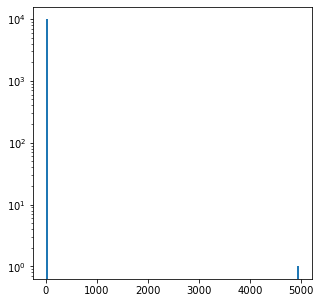

In [381]:
import matplotlib.pyplot as plt
import seaborn as sb
fig = plt.figure(figsize=(5,5))
plt.hist([len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)], bins=100)
plt.yscale('log')
#plt.savefig("~/Downloads")

In [382]:
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

[4960,
 10,
 9,
 9,
 8,
 5,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [412]:
G.number_of_edges()

1343518

In [410]:
len(clusters)

2682157

In [411]:
len(G.nodes)

14886